# <center>Decision Tree Tutorial Using The Iris Data Set</center>

References: 
* http://scikit-learn.org/stable/auto_examples/tree/plot_iris.html#sphx-glr-auto-examples-tree-plot-iris-py
* http://scikit-learn.org/stable/modules/tree.html
* http://matplotlib.org/api/pyplot_api.html#matplotlib.pyplot.contourf

In [36]:
# Import bokeh packages
from bokeh.layouts import column
from bokeh.models import CategoricalColorMapper, ColumnDataSource, CustomJS, Legend, Range, Range1d, Slider
from bokeh.palettes import Category20
from bokeh.plotting import figure, output_file, save, show

# Import python packages
from IPython.display import Image
import graphviz
import numpy as np
import pydotplus 
from sklearn import tree
from sklearn.datasets import load_iris

In [37]:
# Load iris data
iris = load_iris()
trainingData = iris.data
featureNames = iris.feature_names
trainingLabels = iris.target
labelNames = iris.target_names

# Bucket the training data points by training label (i.e. setosa, versicolor or virginica)
# This will make it easier to generate a legend for the plot
label_0 = []
label_1 = []
label_2 = []
for i in range(len(trainingLabels)):
    if trainingLabels[i] == 0:
        label_0.append(i)
    elif trainingLabels[i] == 1:
        label_1.append(i)
    else:
        label_2.append(i)

In [76]:
# Define color palettes for plots (light for decision surfaces, dark for data points)
light_palette = [Category20[6][2*i + 1] for i in range(3)]
dark_palette = [Category20[6][2*i] for i in range(3)]

# Determine the limits of the decision boundary plots
boundary_x_min = min([dataPoint[0] for dataPoint in trainingData]) - 1
boundary_x_max = max([dataPoint[0] for dataPoint in trainingData]) + 1
boundary_x_range = Range1d(boundary_x_min, boundary_x_max, bounds = (boundary_x_min, boundary_x_max))

boundary_y_min = min([dataPoint[1] for dataPoint in trainingData]) - 1
boundary_y_max = max([dataPoint[1] for dataPoint in trainingData]) + 1
boundary_y_range = Range1d(boundary_y_min, boundary_y_max, bounds = (boundary_y_min, boundary_y_max))

accuracies = [0 for i in range(12)]

In [77]:
# Plot the untrained data set
output_file("decision-boundary-depth-0.html")

# Create bokeh figure
bokeh_plot = figure(plot_width=500,
                    plot_height=500,
                    x_range = boundary_x_range,
                    y_range = boundary_y_range,
                    )

# Plot data points in the label_0 bucket
bokeh_plot.circle([trainingData[i][0] for i in label_0], 
                  [trainingData[i][1] for i in label_0],
                  size = 4,
                  fill_color = dark_palette[0],
                  line_color = dark_palette[0],
                  legend = labelNames[0]
                 )

# Plot data points in the label_1 bucket
bokeh_plot.circle([trainingData[i][0] for i in label_1], 
                  [trainingData[i][1] for i in label_1],
                  size = 4,
                  fill_color = dark_palette[1],
                  line_color = dark_palette[1],
                  legend = labelNames[1]
                 )

# Plot data points in the label_2 bucket
bokeh_plot.circle([trainingData[i][0] for i in label_2], 
                  [trainingData[i][1] for i in label_2],
                  size = 4,
                  fill_color = dark_palette[2],
                  line_color = dark_palette[2],
                  legend = labelNames[2]
                 )

# Label axes, place legend
bokeh_plot.xaxis.axis_label = featureNames[0]
bokeh_plot.yaxis.axis_label = featureNames[1]
bokeh_plot.legend.location = "bottom_left"

# Show the resulting bokeh plot (this will save the html file and open it automatically)
# Alternatively, you could replace "show" with "save", which will save the file without opening it
save(bokeh_plot)

INFO:bokeh.core.state:Session output file 'decision-boundary-depth-0.html' already exists, will be overwritten.


'/Users/bradleyputman/Documents/Academic/UC Berkeley/W209-Data Visualization and Communication/Final-Project/decision-tree/decision-boundary-depth-0.html'

In [78]:
# Plot decision boundaries for trees of max depths from 1 to 10
for i in range(1, 13):
    
    # Specify output html file 
    output_file("decision-boundary-depth-%d.html" %i)

    # Train a model on the first two features
    model = tree.DecisionTreeClassifier(max_depth = i)
    X = [ [ dataPoint[0], dataPoint[1] ] for dataPoint in trainingData]
    y = trainingLabels
    model.fit(X, y)

    # Record model accuracy
    accuracies[i-1] = model.score(X, y)

    # Create a mesh grid based on the plot limits, then classify the mesh using the trained model
    xx, yy = np.meshgrid(np.arange(boundary_x_min, boundary_x_max, 0.2), 
                         np.arange(boundary_y_min, boundary_y_max, 0.1))
    z = model.predict(np.c_[xx.ravel(), yy.ravel()])
    zz = z.reshape(xx.shape)

    # Create bokeh figure
    bokeh_plot = figure(plot_width=500,
                        plot_height=500,
                        x_range = boundary_x_range,
                        y_range = boundary_y_range
                        )

    # Plot the mesh grid on the bokeh figure as an image
    # Note: "Z" here is the mesh grid predictions, and it must be contained in a list (i.e. "[Z]" not "Z")
    bokeh_plot.image(image=[zz],
                     alpha = 0,
                     x = boundary_x_min,           
                     y = boundary_y_min,
                     dw =(boundary_x_max - boundary_x_min),
                     dh =(boundary_y_max - boundary_y_min),
                     palette = light_palette
                    )

    # Plot data points in the label_0 bucket
    bokeh_plot.circle([trainingData[i][0] for i in label_0], 
                      [trainingData[i][1] for i in label_0],
                      size = 4,
                      fill_color = dark_palette[0],
                      line_color = dark_palette[0],
                      legend = labelNames[0]
                     )

    # Plot data points in the label_1 bucket
    bokeh_plot.circle([trainingData[i][0] for i in label_1], 
                      [trainingData[i][1] for i in label_1],
                      size = 4,
                      fill_color = dark_palette[1],
                      line_color = dark_palette[1],
                      legend = labelNames[1]
                     )

    # Plot data points in the label_2 bucket
    bokeh_plot.circle([trainingData[i][0] for i in label_2], 
                      [trainingData[i][1] for i in label_2],
                      size = 4,
                      fill_color = dark_palette[2],
                      line_color = dark_palette[2],
                      legend = labelNames[2]
                     )

    # Label axes, place legend
    bokeh_plot.xaxis.axis_label = featureNames[0]
    bokeh_plot.yaxis.axis_label = featureNames[1]
    bokeh_plot.legend.location = "bottom_left"

    # Show the resulting bokeh plot (this will save the html file and open it automatically)
    # Alternatively, you could replace "show" with "save", which will save the file without opening it
    save(bokeh_plot)

INFO:bokeh.core.state:Session output file 'decision-boundary-depth-1.html' already exists, will be overwritten.
INFO:bokeh.core.state:Session output file 'decision-boundary-depth-2.html' already exists, will be overwritten.
INFO:bokeh.core.state:Session output file 'decision-boundary-depth-3.html' already exists, will be overwritten.
INFO:bokeh.core.state:Session output file 'decision-boundary-depth-4.html' already exists, will be overwritten.
INFO:bokeh.core.state:Session output file 'decision-boundary-depth-5.html' already exists, will be overwritten.
INFO:bokeh.core.state:Session output file 'decision-boundary-depth-6.html' already exists, will be overwritten.
INFO:bokeh.core.state:Session output file 'decision-boundary-depth-7.html' already exists, will be overwritten.
INFO:bokeh.core.state:Session output file 'decision-boundary-depth-8.html' already exists, will be overwritten.
INFO:bokeh.core.state:Session output file 'decision-boundary-depth-9.html' already exists, will be overw

In [23]:
# Plot the decision boundary for a fully-counverged tree

# Specify output html file 
output_file("decision-boundary-converged.html")

# Train a model on the first two features
model = tree.DecisionTreeClassifier()
X = [ [ dataPoint[0], dataPoint[1] ] for dataPoint in trainingData]
y = trainingLabels
model.fit(X, y)



# Create a mesh grid based on the plot limits, then classify the mesh using the trained model
xx, yy = np.meshgrid(np.arange(boundary_x_min, boundary_x_max, 0.2), 
                     np.arange(boundary_y_min, boundary_y_max, 0.1))
z = model.predict(np.c_[xx.ravel(), yy.ravel()])
zz = z.reshape(xx.shape)

# Create bokeh figure
bokeh_plot = figure(plot_width=500,
                    plot_height=500,
                    x_range = boundary_x_range,
                    y_range = boundary_y_range
                    )

# Plot the mesh grid on the bokeh figure as an image
# Note: "Z" here is the mesh grid predictions, and it must be contained in a list (i.e. "[Z]" not "Z")
bokeh_plot.image(image=[zz],
                 alpha = 0,
                 x = boundary_x_min,           
                 y = boundary_y_min,
                 dw =(boundary_x_max - boundary_x_min),
                 dh =(boundary_y_max - boundary_y_min),
                 palette = light_palette
                )

# Plot data points in the label_0 bucket
bokeh_plot.circle([trainingData[i][0] for i in label_0], 
                  [trainingData[i][1] for i in label_0],
                  size = 4,
                  fill_color = dark_palette[0],
                  line_color = dark_palette[0],
                  legend = labelNames[0]
                 )

# Plot data points in the label_1 bucket
bokeh_plot.circle([trainingData[i][0] for i in label_1], 
                  [trainingData[i][1] for i in label_1],
                  size = 4,
                  fill_color = dark_palette[1],
                  line_color = dark_palette[1],
                  legend = labelNames[1]
                 )

# Plot data points in the label_2 bucket
bokeh_plot.circle([trainingData[i][0] for i in label_2], 
                  [trainingData[i][1] for i in label_2],
                  size = 4,
                  fill_color = dark_palette[2],
                  line_color = dark_palette[2],
                  legend = labelNames[2]
                 )

# Label axes, place legend
bokeh_plot.xaxis.axis_label = featureNames[0]
bokeh_plot.yaxis.axis_label = featureNames[1]
bokeh_plot.legend.location = "bottom_left"

# Show the resulting bokeh plot (this will save the html file and open it automatically)
# Alternatively, you could replace "show" with "save", which will save the file without opening it
save(bokeh_plot)

'/Users/bradleyputman/Documents/Academic/UC Berkeley/W209-Data Visualization and Communication/Final-Project/decision-tree/decision-boundary-converged.html'

In [42]:
print converged_tree_depth

12


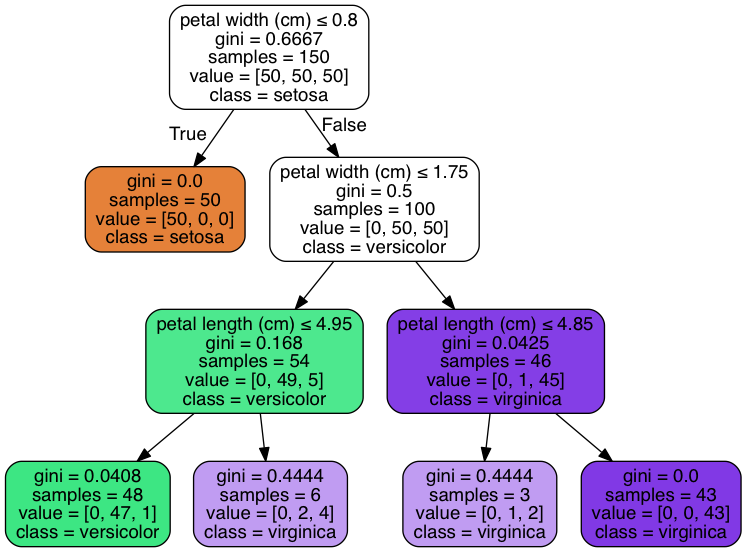

In [10]:
# Specify depth of decision tree
tree_depth = 3
    
# Train the model
model = tree.DecisionTreeClassifier(max_depth = tree_depth)
model.fit(trainingData, trainingLabels)

# Create tree visualization in dot format (via GraphViz)
dot_data = tree.export_graphviz(model, 
                     out_file = None,
                     feature_names=iris.feature_names,  
                     class_names=iris.target_names,  
                     filled=True, rounded=True,  
                     special_characters=True)  

graph = pydotplus.graph_from_dot_data(dot_data)
graph.write('decision-tree-example.png', format = 'png')

# Display graph (optional)
Image('decision-tree-example.png')

In [79]:
# Plot accuracies for all decision trees calculated up to this point
for i in range(1, 13):
    
    # Specify output html file 
    output_file("accuracy-%d.html" %i)

    bokeh_plot = figure(plot_width=500,
                        plot_height=500,
                        x_range = Range1d(0, 13, bounds = (0, 13)),
                        y_range = Range1d(-0.04, 1.04, bounds = (-0.04, 1.04))
                        )

    bokeh_plot.circle([(j+1) for j in range(i)], 
                      [accuracies[j] for j in range(i)],
                      size = 4
                     )

    bokeh_plot.line([(j+1) for j in range(i)], 
                    [accuracies[j] for j in range(i)],
                    line_width=1)

    save(bokeh_plot)

INFO:bokeh.core.state:Session output file 'accuracy-1.html' already exists, will be overwritten.
INFO:bokeh.core.state:Session output file 'accuracy-2.html' already exists, will be overwritten.
INFO:bokeh.core.state:Session output file 'accuracy-3.html' already exists, will be overwritten.
INFO:bokeh.core.state:Session output file 'accuracy-4.html' already exists, will be overwritten.
INFO:bokeh.core.state:Session output file 'accuracy-5.html' already exists, will be overwritten.
INFO:bokeh.core.state:Session output file 'accuracy-6.html' already exists, will be overwritten.
INFO:bokeh.core.state:Session output file 'accuracy-7.html' already exists, will be overwritten.
INFO:bokeh.core.state:Session output file 'accuracy-8.html' already exists, will be overwritten.
INFO:bokeh.core.state:Session output file 'accuracy-9.html' already exists, will be overwritten.
INFO:bokeh.core.state:Session output file 'accuracy-10.html' already exists, will be overwritten.
INFO:bokeh.core.state:Session